In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rotation_range=30,
                            rescale=1.0/255,
                          shear_range=.2,
                          zoom_range=.2,
                           horizontal_flip=True,
                           width_shift_range=.2,
                           height_shift_range=.2
                            )

In [4]:
train_gen=train_datagen.flow_from_directory(    directory="C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 4 - fruits classification CNN\\fruits-360-original-size\\Training",
    batch_size=32,
    target_size=(256,256),
    class_mode="binary")

Found 6231 images belonging to 24 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1.0/255)
test_gen=test_datagen.flow_from_directory( directory="C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 4 - fruits classification CNN\\fruits-360-original-size\\Test",
    batch_size=32,
    target_size=(256,256),
    class_mode="binary")

Found 3110 images belonging to 24 classes.


In [6]:
val_datagen=ImageDataGenerator(rescale=1.0/255)
val_gen=test_datagen.flow_from_directory( directory="C:\\unikaksha\\datascience\\project_DS\\Capstone Project - 4 - fruits classification CNN\\fruits-360-original-size\\Validation",
    batch_size=32,
    target_size=(256,256),
    class_mode="binary")

Found 3114 images belonging to 24 classes.


In [9]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(24,activation="softmax"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_3 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                      

In [11]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [12]:
history=model.fit_generator(train_gen,epochs=3,validation_data=val_gen)

C:\Users\Yadav\AppData\Local\Temp\ipykernel_25268\4213392409.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_gen,epochs=3,validation_data=val_gen)


Epoch 1/3
195/195 [==============================] - 1556s 8s/step - loss: 3.9445 - accuracy: 0.0777 - val_loss: 3.3800 - val_accuracy: 0.0761
Epoch 2/3
195/195 [==============================] - 1393s 7s/step - loss: 3.2750 - accuracy: 0.0835 - val_loss: 3.1611 - val_accuracy: 0.0751
Epoch 3/3
195/195 [==============================] - 1394s 7s/step - loss: 3.2504 - accuracy: 0.0817 - val_loss: 3.1126 - val_accuracy: 0.0838


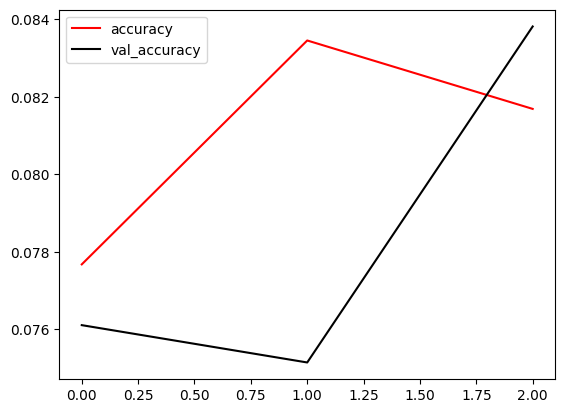

In [13]:
plt.plot(history.history["accuracy"],color="r",label="accuracy")
plt.plot(history.history["val_accuracy"],color="k",label="val_accuracy")
plt.legend()
plt.show()

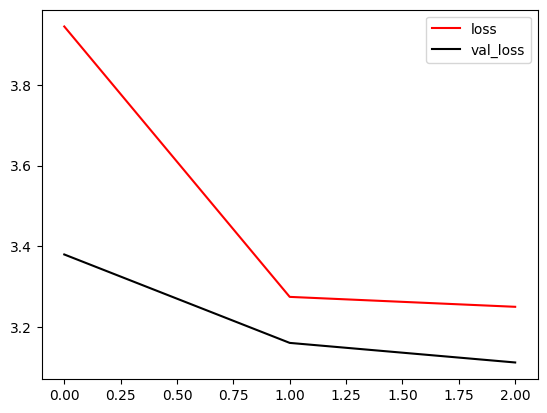

In [14]:
plt.plot(history.history["loss"],color="r",label="loss")
plt.plot(history.history["val_loss"],color="k",label="val_loss")
plt.legend()
plt.show()

In [15]:
model.predict(test_gen)

98/98 [==============================] - 268s 3s/step


array([[0.04675757, 0.04685733, 0.0457486 , ..., 0.03289453, 0.03346894,
        0.03371928],
       [0.04675757, 0.04685733, 0.0457486 , ..., 0.03289453, 0.03346894,
        0.03371928],
       [0.04675757, 0.04685733, 0.0457486 , ..., 0.03289453, 0.03346894,
        0.03371928],
       ...,
       [0.04675757, 0.04685733, 0.0457486 , ..., 0.03289453, 0.03346894,
        0.03371928],
       [0.04675757, 0.04685733, 0.0457486 , ..., 0.03289453, 0.03346894,
        0.03371928],
       [0.04675757, 0.04685733, 0.0457486 , ..., 0.03289453, 0.03346894,
        0.03371928]], dtype=float32)